In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdf

## 9.4 効率的ポートフォリオの導出
包絡線は二つの効率的ポートフォリオから算出できる  
効率的ポートフォリオXとYに比率αで投資したときの期待値と分散の組み合わせが包絡線

### 1.資産の期待収益と分散共分散行列から効率的ポートフォリオを求める
資産は４つと仮定

In [2]:
# 分散共分散行列S
S = np.array([[0.1,0.01,0.03,0.05],[0.01,0.3,0.06,-0.04],[0.03,0.06,0.4,0.02],[0.05,-0.04,0.02,0.5]])
#　期待収益率
E = np.array([0.06, 0.08, 0.1, 0.15])
#定数c
c = 0.04

In [51]:
#一つ目の効率的ポートフォリオ
#c=0として計算
Z = np.dot(np.linalg.inv(S), E)
X = Z / np.sum(Z)

In [54]:
#二つ目の効率的ポートフォリオ
Z = np.dot(np.linalg.inv(S), (E-c))
Y = Z/np.sum(Z)

In [69]:
#各ポートフォリオの統計量
E_X = np.dot(E.T,X)
E_Y = np.dot(E.T,Y)
var_X = np.dot(np.dot(X.T, S),X)
var_Y = np.dot(np.dot(Y.T,S),Y)
sigma_X = np.sqrt(var_X)
sigma_Y = np.sqrt(var_Y)
cov_XY = np.dot(np.dot(X.T, S),Y)
corr_XY = cov_XY / (sigma_X*sigma_Y)

In [85]:
def port_ret(alpha, E_X, E_Y):
    E_port = E_X*alpha + E_Y*(1-alpha)
    return E_port

def port_vol(alpha, var_X, var_Y, cov_XY):
    var_port = np.sqrt(var_X*(alpha**2) + var_Y*((1-alpha)**2) + 2*alpha*(1-alpha)*cov_XY)
    return var_port

In [150]:
#XとYを比率αで組み合わせる
alphas = np.arange(-15, 30, 1) * 0.1
std_port = np.zeros(45)
E_port = np.zeros(45)
for i in range(45):
    alpha = alphas[i]
    std_port[i] = port_vol(alpha, var_X, var_Y, cov_XY)
    E_port[i] = port_ret(alpha, E_X, E_Y)

In [151]:
port = pd.DataFrame({"Expectation":E_port, "STD":std_port}, index=alphas)

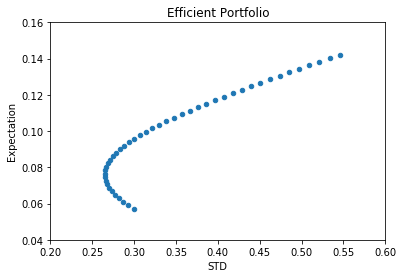

In [152]:
port.plot.scatter(x="STD",y="Expectation",title="Efficient Portfolio",
          xticks=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.6],
          yticks=[0.04,0.06,0.08,0.1,0.12,0.14,0.16],
         legend=False)

## 9.6リスクフリーレートrfのもとで最適化ポートフォリオを見つける

In [153]:

rf = 0.04
Z = np.dot(np.linalg.inv(S), (E-rf))
X_optimal = Z/np.sum(Z)

In [175]:
#最適化ポートフォリオの期待値および分散
E_X_optimal = np.dot(E.T, X_optimal)
var_X_optimal = np.dot(np.dot(X_optimal.T, S), X_optimal)

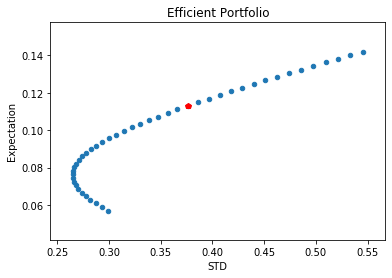

In [163]:
#プロットする
port.plot.scatter(x="STD",y="Expectation",title="Efficient Portfolio",
          xticks=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.6],
          yticks=[0.04,0.06,0.08,0.1,0.12,0.14,0.16],
         legend=False)
plt.plot(np.sqrt(var_X_optimal),E_X_optimal, color="red",marker="p")

## 9.7市場資本線を見つける
無リスク資産金利$r_f$が存在するとき、$(0,r_f)$を通り効率的フロンティアに接する直線を市場資本戦(CML)、接点を市場ポートフォリオMと呼ぶ。
"Python for Finance" P.425参照

In [171]:
std = np.linspace(0,0.55)
CML = (E_X_optimal-rf)/np.sqrt(var_X_optimal)*std + rf

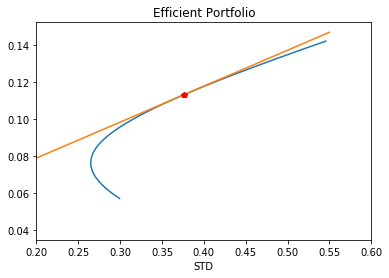

In [174]:

port.plot(x="STD",y="Expectation",title="Efficient Portfolio",
          xticks=[0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.6],
          yticks=[0.04,0.06,0.08,0.1,0.12,0.14,0.16],
         legend=False)
plt.plot(std,CML)
plt.plot(np.sqrt(var_X_optimal), E_X_optimal, color="red", marker="p")

## 9.8SMLの検証ー命題3から命題5を実装する

In [86]:
asset1 = np.array([-0.0663,0.0853,0.0179,0.0725,0.0075,-0.0157,-0.021])
asset2 = np.array([-0.0249,0.0244,0.0446,0.179,-0.0822,0.0083,0.0514])
asset3 = np.array([-0.0427,-0.0315,0.0192,-0.0653,-0.0176,0.1288,0.1341])
asset4 = np.array([0.1172,-0.0833,0.1918,-0.0741,-0.0144,-0.0592,-0.0046])

assets = np.array([asset1,asset2,asset3,asset4])
date = np.array([1,2,3,4,5,6,7])

In [87]:
assets

array([[-0.0663,  0.0853,  0.0179,  0.0725,  0.0075, -0.0157, -0.021 ],
       [-0.0249,  0.0244,  0.0446,  0.179 , -0.0822,  0.0083,  0.0514],
       [-0.0427, -0.0315,  0.0192, -0.0653, -0.0176,  0.1288,  0.1341],
       [ 0.1172, -0.0833,  0.1918, -0.0741, -0.0144, -0.0592, -0.0046]])

In [89]:
data = pd.DataFrame(assets, columns=date)
df = data.T
df.columns = ["asset1","asset2","asset3","asset4"]

In [90]:
df*100

,asset1,asset2,asset3,asset4
1,-6.63,-2.49,-4.27,11.72
2,8.53,2.44,-3.15,-8.33
3,1.79,4.46,1.92,19.18
4,7.25,17.90,-6.53,-7.41
5,0.75,-8.22,-1.76,-1.44
6,-1.57,0.83,12.88,-5.92
7,-2.10,5.14,13.41,-0.46


In [170]:
#平均の収益率
E = pd.DataFrame(assets.mean(axis=1))
E

,0
0,0.011457
1,0.028657
2,0.017857
3,0.010486


In [51]:
#分散共分散行列
S = df.cov()

In [52]:
S

,asset1,asset2,asset3,asset4
asset1,0.002846,0.002231,-0.001775,-0.002790
asset2,0.002231,0.006494,-0.000785,-0.001885
asset3,-0.001775,-0.000785,0.006683,-0.000526
asset4,-0.002790,-0.001885,-0.000526,0.010986


In [185]:
#c=0.05の元で効率的ポートフォリオ
c = 0.05
Z = np.dot(np.linalg.inv(S),(E-c))
X = Z/np.sum(Z)

In [186]:
X

array([[ 0.6181915 ],
       [-0.07257634],
       [ 0.24426367],
       [ 0.21012117]])

In [187]:
df["EP"] = df["asset1"]*X[0] + df["asset2"]*X[1] + df["asset3"]*X[2] + df["asset4"]*X[3]

In [188]:
df

,asset1,asset2,asset3,asset4,Efficient Portfolio,EP
1,-0.0663,-0.0249,-0.0427,0.1172,-0.018188,-0.024983
2,0.0853,0.0244,-0.0315,-0.0833,0.009847,0.025763
3,0.0179,0.0446,0.0192,0.1918,0.054727,0.052820
4,0.0725,0.1790,-0.0653,-0.0741,0.036578,0.000307
5,0.0075,-0.0822,-0.0176,-0.0144,-0.025201,0.003277
6,-0.0157,0.0083,0.1288,-0.0592,0.021643,0.008714
7,-0.0210,0.0514,0.1341,-0.0046,0.041456,0.015077


In [189]:
from sklearn.linear_model import LinearRegression
alpha = []
beta = []
score = []
model = LinearRegression()
columns = ["asset1","asset2","asset3","asset4"]
for col in columns:
    X = df.loc[:,[col]].values
    Y = df.loc[:,["EP"]].values
    model.fit(X,Y)
    alpha.append(model.coef_)
    beta.append(model.intercept_)
    score.append(model.score(X,Y))

In [190]:
beta

[array([0.00924269]),
 array([0.01015679]),
 array([0.01028108]),
 array([0.01100288])]

In [191]:
df_reg1 = pd.DataFrame([alpha,beta,score])

In [192]:
df_reg1.columns=columns
df_reg1.index = ["alpha","beta","score"]

In [193]:
df_reg1

,asset1,asset2,asset3,asset4
alpha,[[0.20295677695205155]],[[0.04924474884006343]],[[0.07206723186724953]],[[0.0538938177174464]]
beta,[0.009242694777991231],[0.010156785762882347],[0.010281084710583852],[0.011002884391004657]
score,0.203542,0.0273476,0.0602739,0.0554115


In [194]:
X = beta
Y = E.iloc[:,0].values
model.fit(X,Y)
gamma0 = model.intercept_
gamma1 = model.coef_
score2 = model.score(X,Y)
    

In [195]:
gamma1

array([-0.22025728])

In [196]:
gamma0

0.01935449216400982